Il s'agit d'un test d'import du dataset CIFAR10 et d'EfficientNEtB0.

In [2]:
from ethicnet import config
from ethicnet import preprocessing
from ethicnet import evaluating
from ethicnet import visualization
from ethicnet import training

## Preprocessing

In [3]:
X_train, Y_train, X_test, Y_test = preprocessing.load_cifar10_dataset()

In [4]:
image_size = X_test.shape[1:-1]
nb_classes = Y_test.shape[1]

In [5]:
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


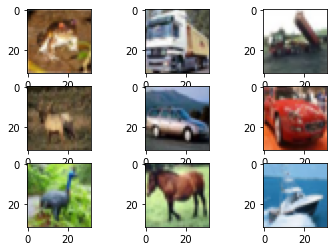

In [6]:
visualization.plot_training_pictures(X_train)

In [7]:
batch_size = 64

In [8]:
learning_rate = 1e-3
epochs = 10

In [12]:
model.fit( X_train, Y_train, batch_size=batch_size, verbose=1)

782/782 [==============================] - 29s 32ms/step - loss: 2.7130 - accuracy: 0.1166


## Training

In [9]:
model = training.build_model(nb_classes = nb_classes, image_size = image_size, learning_rate = learning_rate, img_augmentation = preprocessing.img_augmentation)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
img_augmentation (Sequential)   (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 16, 16, 32)   864         img_augmentation[0][0]           
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 16, 16, 32)   128         stem_conv[0][0]                  
______________________________________________________________________________________________

In [12]:
# fit model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
782/782 [==============================] - 37s 42ms/step - loss: 2.7238 - accuracy: 0.1116 - val_loss: 2.3519 - val_accuracy: 0.1197
Epoch 2/10
782/782 [==============================] - 32s 41ms/step - loss: 2.4516 - accuracy: 0.1196 - val_loss: 2.3275 - val_accuracy: 0.1271
Epoch 3/10
782/782 [==============================] - 32s 41ms/step - loss: 2.4038 - accuracy: 0.1210 - val_loss: 2.3197 - val_accuracy: 0.1306
Epoch 4/10
782/782 [==============================] - 32s 41ms/step - loss: 2.3874 - accuracy: 0.1216 - val_loss: 2.3245 - val_accuracy: 0.1223
Epoch 5/10
782/782 [==============================] - 32s 40ms/step - loss: 2.3716 - accuracy: 0.1214 - val_loss: 2.3420 - val_accuracy: 0.1157
Epoch 6/10
782/782 [==============================] - 32s 41ms/step - loss: 2.3608 - accuracy: 0.1198 - val_loss: 2.3065 - val_accuracy: 0.1307
Epoch 7/10
782/782 [==============================] - 32s 41ms/step - loss: 2.3546 - accuracy: 0.1225 - val_loss: 2.2993 - val_accuracy:

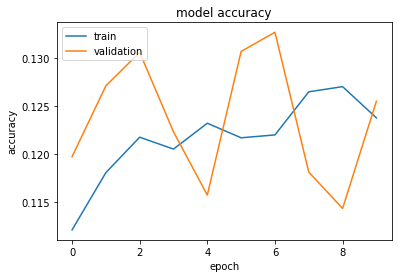

In [15]:
evaluating.plot_hist(history.history)

In [16]:
training.unfreeze_model(model)

In [17]:
history2 = model.fit(X_train, Y_train, epochs=2, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/2
782/782 [==============================] - 44s 50ms/step - loss: 2.2996 - accuracy: 0.1357 - val_loss: 2.2694 - val_accuracy: 0.1475
Epoch 2/2
782/782 [==============================] - 38s 49ms/step - loss: 2.2907 - accuracy: 0.1407 - val_loss: 2.2719 - val_accuracy: 0.1437


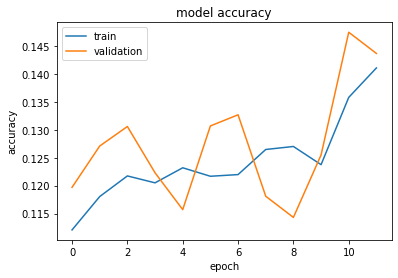

In [27]:
evaluating.plot_global_history(history.history,history2.history)